## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZES = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}

for BATCH_SIZE in BATCH_SIZES:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-batch-%s" % str(BATCH_SIZE)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batc

50000/50000 [==============================] - 242s 5ms/step - loss: 2.2407 - acc: 0.1652 - val_loss: 2.8328 - val_acc: 0.1792
Epoch 46/50
50000/50000 [==============================] - 243s 5ms/step - loss: 2.2440 - acc: 0.1606 - val_loss: 2.6755 - val_acc: 0.1921
Epoch 47/50
50000/50000 [==============================] - 243s 5ms/step - loss: 2.2469 - acc: 0.1590 - val_loss: 2.6770 - val_acc: 0.1984
Epoch 48/50
50000/50000 [==============================] - 243s 5ms/step - loss: 2.2480 - acc: 0.1583 - val_loss: 2.3342 - val_acc: 0.2101
Epoch 49/50
50000/50000 [==============================] - 243s 5ms/step - loss: 2.2493 - acc: 0.1547 - val_loss: 2.4958 - val_acc: 0.1897
Epoch 50/50
50000/50000 [==============================] - 242s 5ms/step - loss: 2.2429 - acc: 0.1599 - val_loss: 2.5510 - val_acc: 0.1697
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)     

50000/50000 [==============================] - 37s 746us/step - loss: 1.1122 - acc: 0.6065 - val_loss: 1.3563 - val_acc: 0.5319
Epoch 44/50
50000/50000 [==============================] - 37s 742us/step - loss: 1.1043 - acc: 0.6073 - val_loss: 1.3554 - val_acc: 0.5241
Epoch 45/50
50000/50000 [==============================] - 37s 746us/step - loss: 1.1046 - acc: 0.6069 - val_loss: 1.3820 - val_acc: 0.5199
Epoch 46/50
50000/50000 [==============================] - 37s 746us/step - loss: 1.0974 - acc: 0.6106 - val_loss: 1.3988 - val_acc: 0.5174
Epoch 47/50
50000/50000 [==============================] - 37s 746us/step - loss: 1.0902 - acc: 0.6121 - val_loss: 1.3749 - val_acc: 0.5227
Epoch 48/50
50000/50000 [==============================] - 37s 743us/step - loss: 1.0808 - acc: 0.6145 - val_loss: 1.3832 - val_acc: 0.5250
Epoch 49/50
50000/50000 [==============================] - 37s 743us/step - loss: 1.0791 - acc: 0.6164 - val_loss: 1.3636 - val_acc: 0.5311
Epoch 50/50
50000/50000 [=======

50000/50000 [==============================] - 22s 449us/step - loss: 0.8554 - acc: 0.6937 - val_loss: 1.5651 - val_acc: 0.4960
Epoch 42/50
50000/50000 [==============================] - 22s 437us/step - loss: 0.8439 - acc: 0.6980 - val_loss: 1.5148 - val_acc: 0.5168
Epoch 43/50
50000/50000 [==============================] - 19s 388us/step - loss: 0.8337 - acc: 0.7001 - val_loss: 1.6875 - val_acc: 0.4689
Epoch 44/50
50000/50000 [==============================] - 21s 412us/step - loss: 0.8393 - acc: 0.7001 - val_loss: 1.5717 - val_acc: 0.5056
Epoch 45/50
50000/50000 [==============================] - 22s 450us/step - loss: 0.8349 - acc: 0.7030 - val_loss: 1.5462 - val_acc: 0.5086
Epoch 46/50
50000/50000 [==============================] - 22s 448us/step - loss: 0.8230 - acc: 0.7064 - val_loss: 1.5294 - val_acc: 0.5119
Epoch 47/50
50000/50000 [==============================] - 22s 435us/step - loss: 0.8089 - acc: 0.7097 - val_loss: 1.5787 - val_acc: 0.4957
Epoch 48/50
50000/50000 [=======

50000/50000 [==============================] - 10s 196us/step - loss: 0.3835 - acc: 0.8674 - val_loss: 2.4349 - val_acc: 0.4475
Epoch 40/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.3762 - acc: 0.8700 - val_loss: 2.1527 - val_acc: 0.4678
Epoch 41/50
50000/50000 [==============================] - 10s 194us/step - loss: 0.3589 - acc: 0.8769 - val_loss: 2.3323 - val_acc: 0.4486
Epoch 42/50
50000/50000 [==============================] - 10s 196us/step - loss: 0.3385 - acc: 0.8836 - val_loss: 2.1322 - val_acc: 0.4655
Epoch 43/50
50000/50000 [==============================] - 10s 197us/step - loss: 0.3241 - acc: 0.8907 - val_loss: 2.2275 - val_acc: 0.4713
Epoch 44/50
50000/50000 [==============================] - 10s 196us/step - loss: 0.3117 - acc: 0.8939 - val_loss: 2.5498 - val_acc: 0.4458
Epoch 45/50
50000/50000 [==============================] - 10s 199us/step - loss: 0.3077 - acc: 0.8934 - val_loss: 2.2801 - val_acc: 0.4711
Epoch 46/50
50000/50000 [=======

50000/50000 [==============================] - 6s 117us/step - loss: 0.3478 - acc: 0.8923 - val_loss: 1.9893 - val_acc: 0.4737
Epoch 38/50
50000/50000 [==============================] - 6s 122us/step - loss: 0.3304 - acc: 0.8973 - val_loss: 2.2021 - val_acc: 0.4700
Epoch 39/50
50000/50000 [==============================] - 6s 118us/step - loss: 0.3178 - acc: 0.9017 - val_loss: 2.0784 - val_acc: 0.4729
Epoch 40/50
50000/50000 [==============================] - 6s 121us/step - loss: 0.3021 - acc: 0.9079 - val_loss: 2.2415 - val_acc: 0.4601
Epoch 41/50
50000/50000 [==============================] - 6s 120us/step - loss: 0.2840 - acc: 0.9139 - val_loss: 2.2140 - val_acc: 0.4696
Epoch 42/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.2681 - acc: 0.9198 - val_loss: 2.2813 - val_acc: 0.4636
Epoch 43/50
50000/50000 [==============================] - 6s 118us/step - loss: 0.2527 - acc: 0.9242 - val_loss: 2.2150 - val_acc: 0.4822
Epoch 44/50
50000/50000 [==============

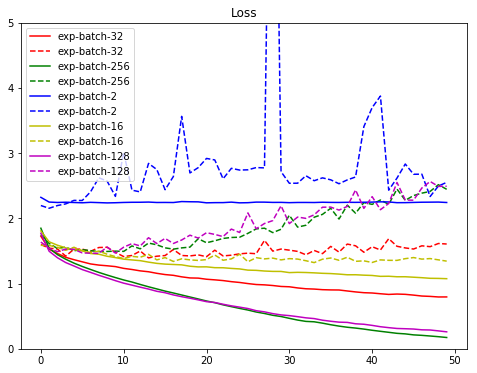

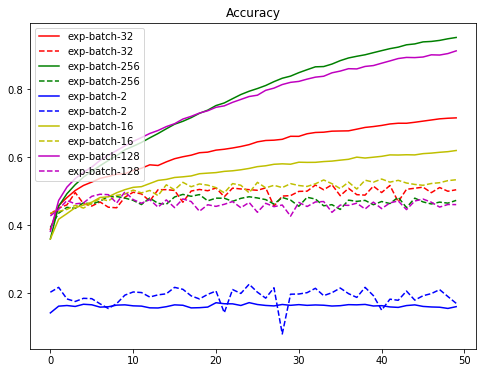

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## 2. Before Activation function

In [11]:
from keras.layers import Activation
"""
建立神經網路，並加入 BN layer (before activation function)
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [12]:
results = {}

for BATCH_SIZE in BATCH_SIZES:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-batch-%s" % str(BATCH_SIZE)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
__________

50000/50000 [==============================] - 254s 5ms/step - loss: 2.2712 - acc: 0.1350 - val_loss: 2.2935 - val_acc: 0.1093
Epoch 47/50
50000/50000 [==============================] - 253s 5ms/step - loss: 2.2707 - acc: 0.1385 - val_loss: 2.2901 - val_acc: 0.1085
Epoch 48/50
50000/50000 [==============================] - 254s 5ms/step - loss: 2.2712 - acc: 0.1381 - val_loss: 2.2926 - val_acc: 0.1062
Epoch 49/50
50000/50000 [==============================] - 254s 5ms/step - loss: 2.2701 - acc: 0.1391 - val_loss: 2.2980 - val_acc: 0.1182
Epoch 50/50
50000/50000 [==============================] - 255s 5ms/step - loss: 2.2692 - acc: 0.1366 - val_loss: 2.2867 - val_acc: 0.1137
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)             

50000/50000 [==============================] - 39s 772us/step - loss: 0.5574 - acc: 0.8038 - val_loss: 1.7496 - val_acc: 0.5148
Epoch 42/50
50000/50000 [==============================] - 38s 768us/step - loss: 0.5576 - acc: 0.8040 - val_loss: 1.8283 - val_acc: 0.5120
Epoch 43/50
50000/50000 [==============================] - 38s 767us/step - loss: 0.5392 - acc: 0.8087 - val_loss: 1.8184 - val_acc: 0.5089
Epoch 44/50
50000/50000 [==============================] - 39s 777us/step - loss: 0.5316 - acc: 0.8136 - val_loss: 1.7909 - val_acc: 0.5043
Epoch 45/50
50000/50000 [==============================] - 38s 766us/step - loss: 0.5127 - acc: 0.8191 - val_loss: 1.7408 - val_acc: 0.5250
Epoch 46/50
50000/50000 [==============================] - 39s 771us/step - loss: 0.5191 - acc: 0.8187 - val_loss: 1.6620 - val_acc: 0.5296
Epoch 47/50
50000/50000 [==============================] - 38s 766us/step - loss: 0.5066 - acc: 0.8212 - val_loss: 1.7022 - val_acc: 0.5231
Epoch 48/50
50000/50000 [=======

50000/50000 [==============================] - 22s 447us/step - loss: 0.3305 - acc: 0.8840 - val_loss: 2.2553 - val_acc: 0.4953
Epoch 37/50
50000/50000 [==============================] - 23s 453us/step - loss: 0.3151 - acc: 0.8884 - val_loss: 2.2974 - val_acc: 0.4962
Epoch 38/50
50000/50000 [==============================] - 23s 454us/step - loss: 0.3120 - acc: 0.8894 - val_loss: 2.1867 - val_acc: 0.4784
Epoch 39/50
50000/50000 [==============================] - 23s 457us/step - loss: 0.2970 - acc: 0.8943 - val_loss: 2.3603 - val_acc: 0.4855
Epoch 40/50
50000/50000 [==============================] - 22s 450us/step - loss: 0.2910 - acc: 0.8970 - val_loss: 2.4776 - val_acc: 0.4841
Epoch 41/50
50000/50000 [==============================] - 23s 452us/step - loss: 0.2804 - acc: 0.9013 - val_loss: 2.4277 - val_acc: 0.4885
Epoch 42/50
50000/50000 [==============================] - 23s 456us/step - loss: 0.2820 - acc: 0.8989 - val_loss: 2.3312 - val_acc: 0.4871
Epoch 43/50
50000/50000 [=======

50000/50000 [==============================] - 10s 205us/step - loss: 0.1455 - acc: 0.9582 - val_loss: 2.6948 - val_acc: 0.4520
Epoch 32/50
50000/50000 [==============================] - 10s 203us/step - loss: 0.1387 - acc: 0.9609 - val_loss: 2.7979 - val_acc: 0.4383
Epoch 33/50
50000/50000 [==============================] - 10s 199us/step - loss: 0.1294 - acc: 0.9618 - val_loss: 2.5595 - val_acc: 0.4636
Epoch 34/50
50000/50000 [==============================] - 10s 200us/step - loss: 0.1184 - acc: 0.9673 - val_loss: 2.7765 - val_acc: 0.4496
Epoch 35/50
50000/50000 [==============================] - 10s 202us/step - loss: 0.1086 - acc: 0.9715 - val_loss: 2.6483 - val_acc: 0.4735
Epoch 36/50
50000/50000 [==============================] - 11s 212us/step - loss: 0.1016 - acc: 0.9713 - val_loss: 2.7985 - val_acc: 0.4532
Epoch 37/50
50000/50000 [==============================] - 10s 199us/step - loss: 0.0951 - acc: 0.9737 - val_loss: 2.7514 - val_acc: 0.4633
Epoch 38/50
50000/50000 [=======

50000/50000 [==============================] - 6s 123us/step - loss: 0.2832 - acc: 0.9277 - val_loss: 1.9884 - val_acc: 0.4715
Epoch 27/50
50000/50000 [==============================] - 6s 121us/step - loss: 0.2549 - acc: 0.9369 - val_loss: 2.0490 - val_acc: 0.4693
Epoch 28/50
50000/50000 [==============================] - 6s 120us/step - loss: 0.2321 - acc: 0.9454 - val_loss: 2.2374 - val_acc: 0.4435
Epoch 29/50
50000/50000 [==============================] - 6s 121us/step - loss: 0.2089 - acc: 0.9534 - val_loss: 2.0901 - val_acc: 0.4639
Epoch 30/50
50000/50000 [==============================] - 6s 118us/step - loss: 0.1918 - acc: 0.9578 - val_loss: 2.0689 - val_acc: 0.4679
Epoch 31/50
50000/50000 [==============================] - 6s 118us/step - loss: 0.1678 - acc: 0.9659 - val_loss: 2.4116 - val_acc: 0.4638
Epoch 32/50
50000/50000 [==============================] - 6s 123us/step - loss: 0.1544 - acc: 0.9691 - val_loss: 2.2225 - val_acc: 0.4745
Epoch 33/50
50000/50000 [==============

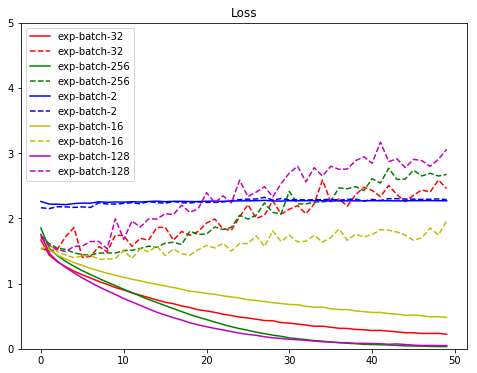

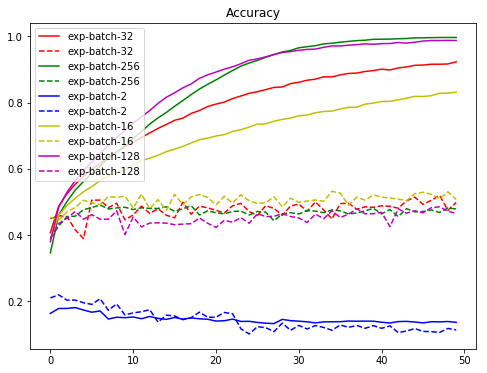

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## 3. after the input layer (only)

In [15]:
from keras.layers import Activation
"""
建立神經網路，並加入 BN layer (before activation function)
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(x)
            x = Activation('relu')(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [16]:
results = {}

for BATCH_SIZE in BATCH_SIZES:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-batch-%s" % str(BATCH_SIZE)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_31 (Batc (None, 512)               2048      
_________________________________________________________________
activation_16 (Activation)   (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
activation_17 (Activation)   (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
__________

50000/50000 [==============================] - 232s 5ms/step - loss: 2.0556 - acc: 0.2582 - val_loss: 1.7848 - val_acc: 0.3724
Epoch 49/50
50000/50000 [==============================] - 232s 5ms/step - loss: 2.0556 - acc: 0.2563 - val_loss: 1.8060 - val_acc: 0.3473
Epoch 50/50
50000/50000 [==============================] - 232s 5ms/step - loss: 2.0581 - acc: 0.2549 - val_loss: 1.7817 - val_acc: 0.3622
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_32 (Batc (None, 512)               2048      
_________________________________________________________________
activation_19 (Activation)   (None, 512)               0         
_

50000/50000 [==============================] - 36s 711us/step - loss: 0.4082 - acc: 0.8552 - val_loss: 2.0715 - val_acc: 0.5189
Epoch 46/50
50000/50000 [==============================] - 35s 701us/step - loss: 0.4017 - acc: 0.8584 - val_loss: 2.2460 - val_acc: 0.5082
Epoch 47/50
50000/50000 [==============================] - 35s 705us/step - loss: 0.3996 - acc: 0.8571 - val_loss: 2.1755 - val_acc: 0.5129
Epoch 48/50
50000/50000 [==============================] - 35s 696us/step - loss: 0.3861 - acc: 0.8634 - val_loss: 2.2336 - val_acc: 0.5176
Epoch 49/50
50000/50000 [==============================] - 35s 705us/step - loss: 0.3762 - acc: 0.8656 - val_loss: 2.1099 - val_acc: 0.5228
Epoch 50/50
50000/50000 [==============================] - 35s 694us/step - loss: 0.3754 - acc: 0.8654 - val_loss: 2.1892 - val_acc: 0.5240
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 3072

50000/50000 [==============================] - 20s 406us/step - loss: 0.2312 - acc: 0.9177 - val_loss: 2.6576 - val_acc: 0.5011
Epoch 43/50
50000/50000 [==============================] - 20s 408us/step - loss: 0.2194 - acc: 0.9243 - val_loss: 2.9492 - val_acc: 0.4754
Epoch 44/50
50000/50000 [==============================] - 21s 417us/step - loss: 0.2143 - acc: 0.9253 - val_loss: 2.7472 - val_acc: 0.5008
Epoch 45/50
50000/50000 [==============================] - 20s 404us/step - loss: 0.2076 - acc: 0.9265 - val_loss: 2.6558 - val_acc: 0.4910
Epoch 46/50
50000/50000 [==============================] - 20s 407us/step - loss: 0.2034 - acc: 0.9291 - val_loss: 2.5430 - val_acc: 0.5152
Epoch 47/50
50000/50000 [==============================] - 20s 409us/step - loss: 0.1999 - acc: 0.9285 - val_loss: 2.5324 - val_acc: 0.5178
Epoch 48/50
50000/50000 [==============================] - 21s 414us/step - loss: 0.1999 - acc: 0.9298 - val_loss: 2.8859 - val_acc: 0.4870
Epoch 49/50
50000/50000 [=======

50000/50000 [==============================] - 9s 181us/step - loss: 0.1587 - acc: 0.9503 - val_loss: 3.1624 - val_acc: 0.4580
Epoch 40/50
50000/50000 [==============================] - 9s 186us/step - loss: 0.1434 - acc: 0.9558 - val_loss: 2.8288 - val_acc: 0.4769
Epoch 41/50
50000/50000 [==============================] - 10s 190us/step - loss: 0.1363 - acc: 0.9584 - val_loss: 3.2888 - val_acc: 0.4332
Epoch 42/50
50000/50000 [==============================] - 9s 182us/step - loss: 0.1258 - acc: 0.9626 - val_loss: 3.2971 - val_acc: 0.4531
Epoch 43/50
50000/50000 [==============================] - 9s 180us/step - loss: 0.1306 - acc: 0.9599 - val_loss: 3.4561 - val_acc: 0.4415
Epoch 44/50
50000/50000 [==============================] - 9s 182us/step - loss: 0.1225 - acc: 0.9626 - val_loss: 3.1452 - val_acc: 0.4639
Epoch 45/50
50000/50000 [==============================] - 9s 183us/step - loss: 0.1181 - acc: 0.9639 - val_loss: 2.9829 - val_acc: 0.4742
Epoch 46/50
50000/50000 [=============

Epoch 37/50
50000/50000 [==============================] - 5s 109us/step - loss: 0.2347 - acc: 0.9340 - val_loss: 2.4774 - val_acc: 0.4661
Epoch 38/50
50000/50000 [==============================] - 5s 109us/step - loss: 0.2173 - acc: 0.9399 - val_loss: 2.6664 - val_acc: 0.4687
Epoch 39/50
50000/50000 [==============================] - 6s 111us/step - loss: 0.2026 - acc: 0.9448 - val_loss: 2.4025 - val_acc: 0.4736
Epoch 40/50
50000/50000 [==============================] - 5s 107us/step - loss: 0.1891 - acc: 0.9490 - val_loss: 2.5085 - val_acc: 0.4755
Epoch 41/50
50000/50000 [==============================] - 5s 105us/step - loss: 0.1749 - acc: 0.9531 - val_loss: 2.7383 - val_acc: 0.4574
Epoch 42/50
50000/50000 [==============================] - 5s 105us/step - loss: 0.1700 - acc: 0.9538 - val_loss: 2.9319 - val_acc: 0.4372
Epoch 43/50
50000/50000 [==============================] - 6s 112us/step - loss: 0.1487 - acc: 0.9632 - val_loss: 3.0110 - val_acc: 0.4597
Epoch 44/50
50000/50000 [==

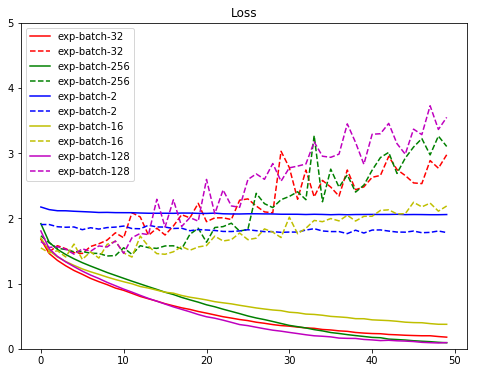

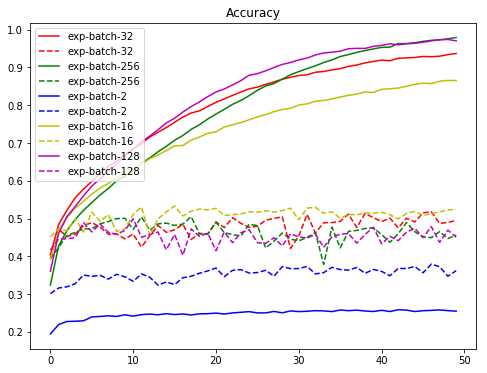

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()